# **Decision Tree: Prediction of Heart Disease in a Patient**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# agenda
# 1) Analysis
# 2) Missing data analysis
# 3) outlier analysis
# 4) visualization

In [ ]:
# uploading the dataset
df = pd.read_csv('/content/heart-1.csv')
# reading the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



**age**: the age of the patient in years.

**sex**: the sex of the patient (1 = male, 0 = female).

**cp**: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

**trestbps**: the resting blood pressure of the patient in mm Hg.

**chol**: the serum cholesterol level of the patient in mg/dl.

**fbs**: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

**restecg**: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

**thalach**: the maximum heart rate achieved by the patient during exercise.
exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: the ST depression induced by exercise relative to rest.
slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest
Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

**ca**: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

**thal**: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

**target**: the presence of heart disease in the patient (0 = no disease, 1 = disease present).





In [ ]:
# shape of the dataset
df.shape

(303, 14)

In [ ]:
# null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#**Data Preprocessing and EDA**#

In [ ]:
# duplication
df.duplicated().sum()

1

In [ ]:
# drop the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(302, 14)

In [ ]:
# col -> object -> fill NaN -> Mode
# col -> num -> fill NaN, -> Mean/Median

In [ ]:
# gathering the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
# correalation of the data
df.corr()*100

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,100.000000,-9.496249,-6.310659,28.312068,20.721551,11.949213,-11.159006,-39.523519,9.321585,20.603964,-16.412423,30.226121,6.531729,-22.147583
sex,-9.496249,100.000000,-5.173952,-5.764694,-19.557144,4.602218,-6.035051,-4.643866,14.346012,9.832173,-3.298963,11.306039,21.145220,-28.360936
cp,-6.310659,-5.173952,100.000000,4.648642,-7.268161,9.601810,4.156100,29.336658,-39.293737,-14.669225,11.685419,-19.535634,-16.036963,43.207959
trestbps,28.312068,-5.764694,4.648642,100.000000,12.525629,17.812469,-11.536656,-4.802271,6.852626,19.459995,-12.287293,9.924834,6.286958,-14.626866
chol,20.721551,-19.557144,-7.268161,12.525629,100.000000,1.142830,-14.760177,-0.530850,6.409890,5.008602,0.041666,8.687794,9.681045,-8.143720
fbs,11.949213,4.602218,9.601810,17.812469,1.142830,100.000000,-8.308108,-0.716929,2.472879,0.451427,-5.865354,14.493475,-3.275238,-2.682597
restecg,-11.159006,-6.035051,4.156100,-11.536656,-14.760177,-8.308108,100.000000,4.120981,-6.880655,-5.625071,9.040215,-8.311244,-1.047317,13.487445
thalach,-39.523519,-4.643866,29.336658,-4.802271,-0.530850,-0.716929,4.120981,100.000000,-37.741145,-34.220075,38.475438,-22.831108,-9.490994,41.995504
exang,9.321585,14.346012,-39.293737,6.852626,6.409890,2.472879,-6.880655,-37.741145,100.000000,28.676634,-25.610624,12.537710,20.582566,-43.560076
oldpeak,20.603964,9.832173,-14.669225,19.459995,5.008602,0.451427,-5.625071,-34.220075,28.676634,100.000000,-57.631438,23.656044,20.909049,-42.914583


In [ ]:
# columns within dataset|
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# target columns
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [ ]:
# chol col
# normally <300
# chol, find the shape for rows which are having the chol>300
df[df['chol']>300].shape

(43, 14)

In [ ]:
df[df['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [ ]:
# find the person having age greater than 40 and chol>300
# they are prone the heart conditions
df[(df['chol']>300) & (df['age']>40)].shape

(42, 14)

In [ ]:
# thal: the type of thallium scan performed on the patient
#  (1 = fixed defect, 2 = reversible defect, 3 = normal)
# find the people having condition 2 of thal, put then in new df
f = df[df['thal']==2]
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [ ]:
# find the people who are the having the heart condition with thal==2
f[f['target']==1].shape

(129, 14)

In [ ]:
# statistical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


#**Visualization**#

Text(0.5, 1.0, 'Age Distribution')

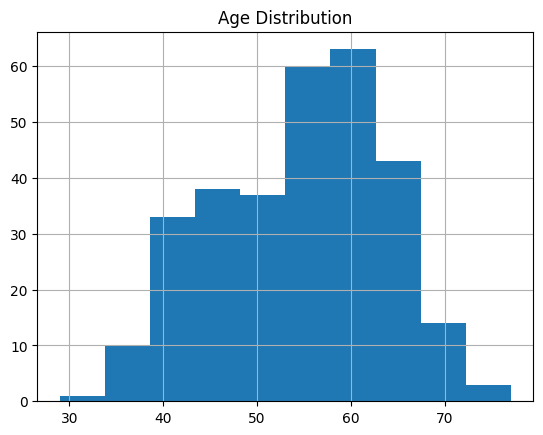

In [ ]:
# visualization of age
df['age'].hist(grid=True, bins=10)
plt.title("Age Distribution")

<Axes: xlabel='age', ylabel='Density'>

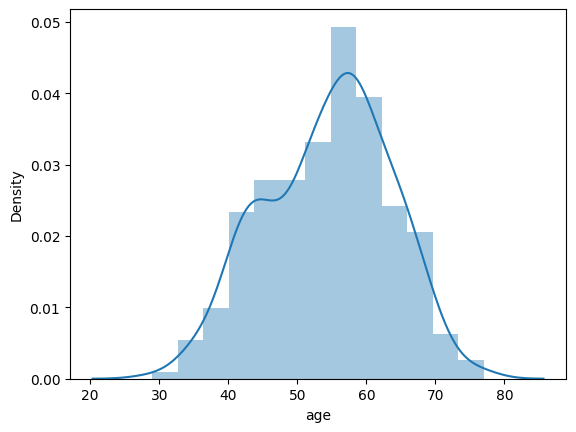

In [ ]:
sns.distplot(df['age'])

<Axes: xlabel='age', ylabel='Density'>

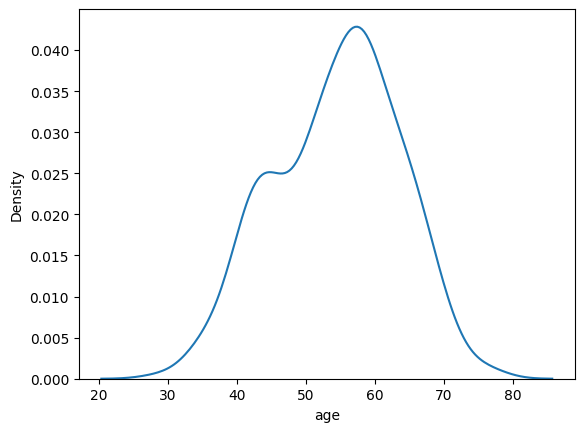

In [ ]:
# kernel Density plot (KDE)
sns.kdeplot(df['age'])

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

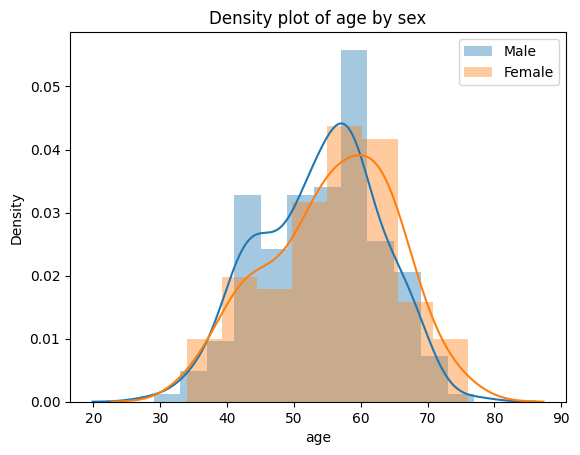

In [ ]:
sns.distplot(df[df['sex']==1]['age'],  label='Male')
sns.distplot(df[df['sex']==0]['age'], label='Female')
plt.legend()
plt.title("Density plot of age by sex")
plt.show()

Text(0.5, 1.0, 'Resting blood pressure distribution')

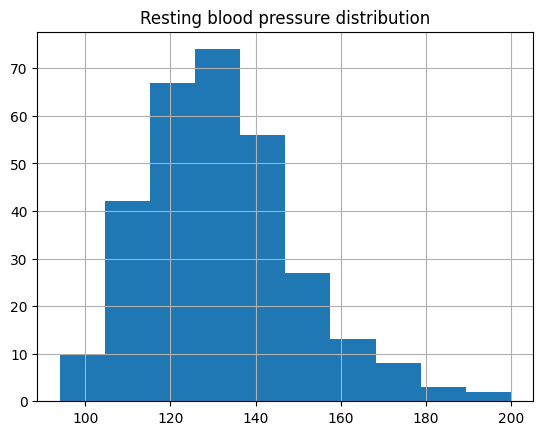

In [ ]:
# trestbps
df['trestbps'].hist()
plt.title("Resting blood pressure distribution")

<Axes: xlabel='trestbps', ylabel='Density'>

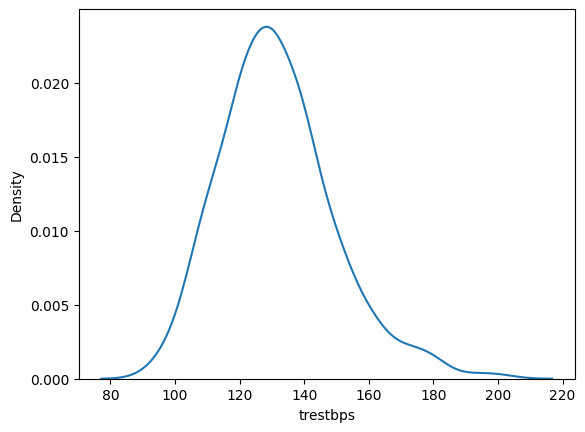

In [ ]:
sns.kdeplot(df['trestbps'])

<Axes: >

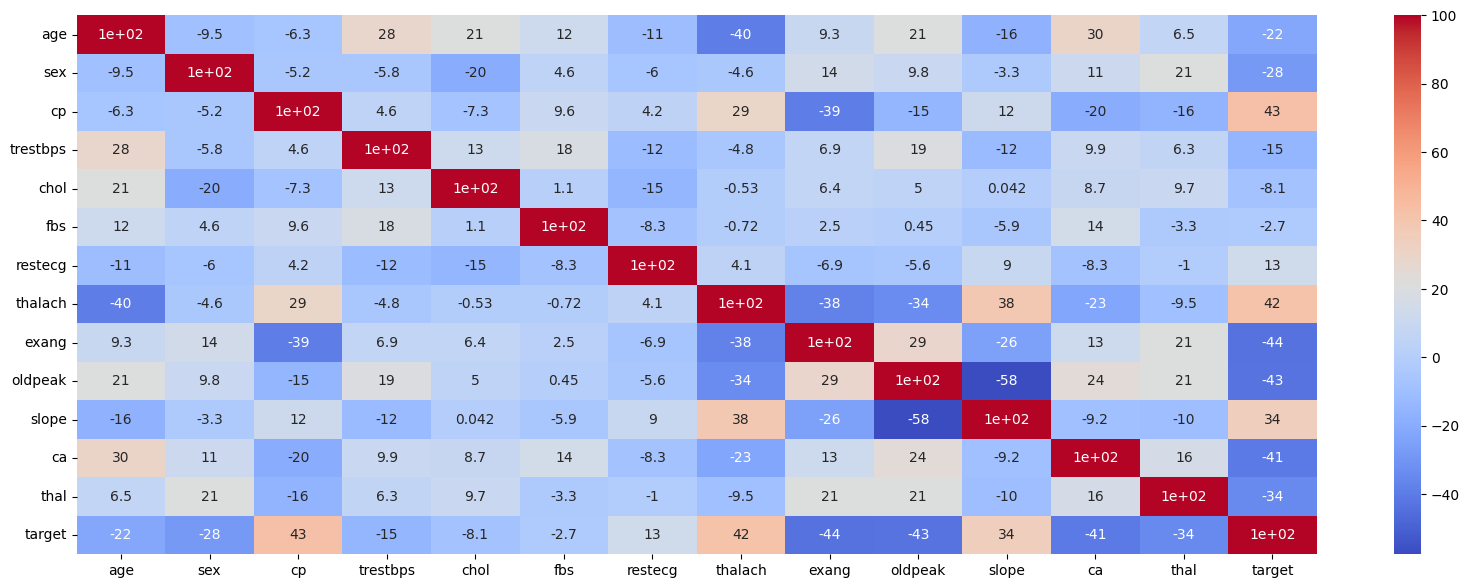

In [ ]:
# heatmap
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr()*100, annot=True, cmap='coolwarm')

<Axes: xlabel='oldpeak'>

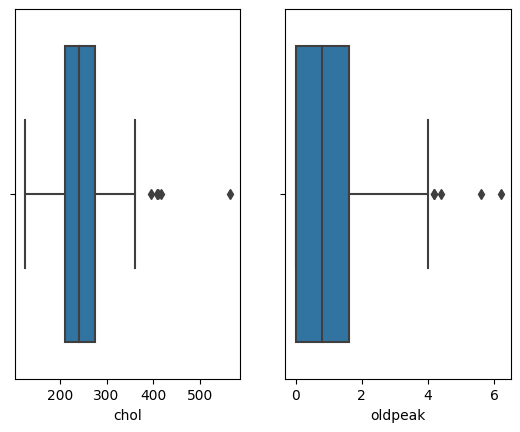

In [ ]:
# chol, oldpeak
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(x='chol', data=df, ax=axes[0])
sns.boxplot(x='oldpeak', data=df, ax=axes[1])

In [ ]:
# Q3, Q1
# 75% ->
# 25% ->
# IQR = Q3-Q1
# UL = Q3 + 1.5 * IQR
# LL = Q1 - 1.5* IQR

# df['chol']>LL & df['chol']<UL
# elimination will be completed

Text(0.5, 1.0, 'Count of target feature by sex')

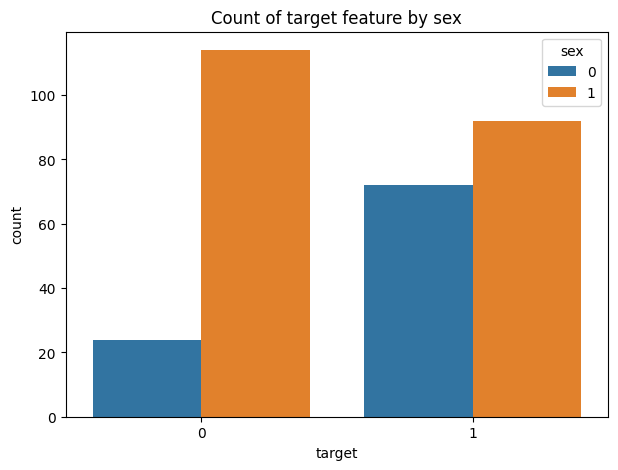

In [ ]:
# visualize the effect gender on the target col
plt.figure(figsize=(7, 5))
sns.countplot(x='target', hue='sex', data=df)
plt.title("Count of target feature by sex")

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# part 2
# supervised ML algo - Decision Tree
# divide our data
# create the model
# train model, test
# performance

In [ ]:
# division of the data into x and y (predictors and target)
# x -> all of columns else than target
# y -> target

X = df.iloc[:, :-1]
y = df['target']
X.shape, y.shape

((302, 13), (302,))

In [ ]:
#x_train-- remaining 70% of x
#y_train-- remaining 70% of y
#x_test-- 30%of x== 30 records from the df and store those values in x_test
#y_test-- 30%of y== 30 records from the df and store those values in y_test

In [ ]:
#importing of libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
x_train.shape, x_test.shape

((211, 13), (91, 13))

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3


In [ ]:
y_train

230    0
157    1
48     1
101    1
55     1
      ..
58     1
87     1
198    0
175    0
122    1
Name: target, Length: 211, dtype: int64

In [ ]:
# DecisionTree
clf = tree.DecisionTreeClassifier(random_state=24)
clf.fit(x_train, y_train) # training

DecisionTreeClassifier(random_state=24)

In [ ]:
# test the model
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
y_train_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
y_test_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0])

In [ ]:
y_test

296    0
170    0
18     1
43     1
246    0
      ..
111    1
194    0
281    0
221    0
249    0
Name: target, Length: 91, dtype: int64

In [ ]:
print(f'Train Score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test Score: {accuracy_score(y_test_pred, y_test)}')

X_Train Score: 1.0
Test Score: 0.7252747252747253


In [ ]:
# helper function
def plt_confMat(predict, actual, label):
  print(f"{label} Confusion Matrix")
  cf = confusion_matrix(predict, actual)
  sns.heatmap(cf, annot=True)
  plt.show()

Train Confusion Matrix


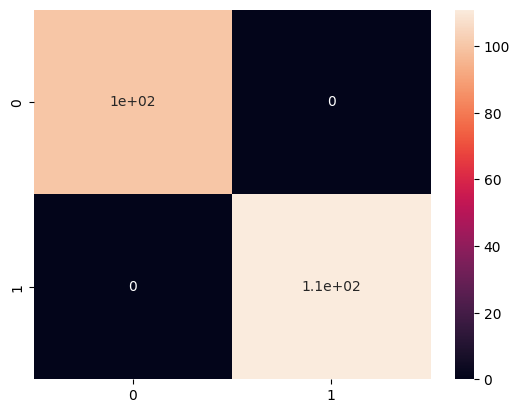

In [ ]:
plt_confMat(y_train_pred, y_train, 'Train')

Test Confusion Matrix


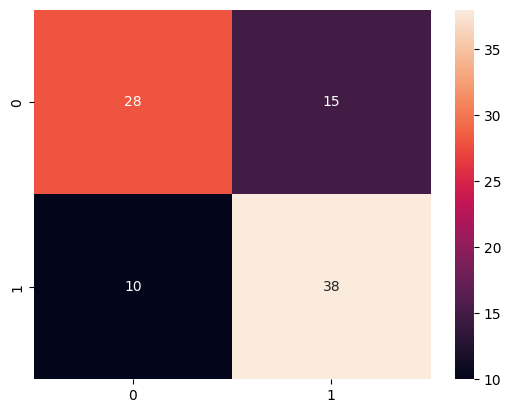

In [ ]:
plt_confMat(y_test_pred, y_test, 'Test')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        43
           1       0.72      0.79      0.75        48

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



[Text(0.5450581395348837, 0.9444444444444444, 'x[2] <= 0.5\ngini = 0.499\nsamples = 211\nvalue = [100, 111]'),
 Text(0.35755813953488375, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.403\nsamples = 111\nvalue = [80, 31]'),
 Text(0.23837209302325582, 0.7222222222222222, 'x[12] <= 2.5\ngini = 0.498\nsamples = 49\nvalue = [23, 26]'),
 Text(0.1511627906976744, 0.6111111111111112, 'x[9] <= 1.7\ngini = 0.328\nsamples = 29\nvalue = [6, 23]'),
 Text(0.09302325581395349, 0.5, 'x[3] <= 145.0\ngini = 0.211\nsamples = 25\nvalue = [3, 22]'),
 Text(0.046511627906976744, 0.3888888888888889, 'x[4] <= 316.5\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.023255813953488372, 0.2777777777777778, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.06976744186046512, 0.2777777777777778, 'x[9] <= 0.3\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.046511627906976744, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09302325581395349, 0.16666666666666666, 'gini = 0.0\ns

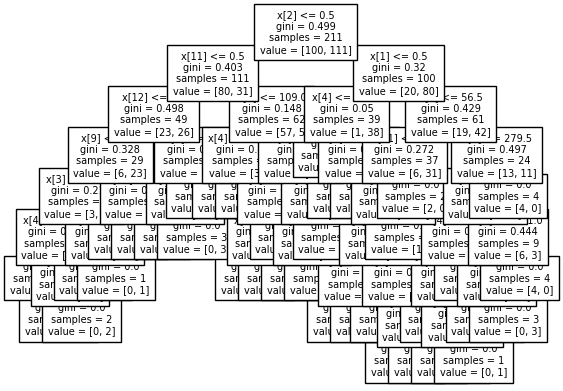

In [ ]:
tree.plot_tree(clf, fontsize=7)

In [ ]:
# criterion = 'gini'/'entropy'

In [ ]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives.
#Thus, for all the people who actually have heart disease,
#recall tells us how many were correctly identified as a heart patient.
#Layman definition: Of all the actual positive examples out there,
#how many of them did I correctly predict to be positive?

#precision of class 0 = TP of class 0/total number of object
#What is the Precision for our model?
#Yes, it is 0.73 or, when it predicts that a patient has heart disease, it is correct around 73% of the time.
#precision of class 1 = TP of class 1/total number of object
#Layman definition: Of all the positive predictions I made, how many of them are truly positive?


#macro average = (precision of class 0 + precision of class 1)/2

#weighted average is precision of all classes merge together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1)

#F1-score is a measure of a model's accuracy on a dataset
#a good F1 score means that you have low false positives and low false negatives,
#Accuracy is used when the True Positives and True negatives are more important while
#F1-score is used when the False Negatives and False Positives are crucial.
#Support is the number of actual occurrences of the class in the specified dataset.

# Accuracy tells you how many times the ML model was correct overall.
# Precision is how good the model is at predicting a specific category.
# Recall tells you how many times the model was able to detect a specific category.

# Hyper Parameter tuning

#Hyperparameter tuning refers to the process of selecting the optimal values for the hyperparameters of a machine learning model.

#max depth -

max_depth is a parameter in decision tree algorithms that specifies the maximum depth or maximum number of levels allowed in the decision tree.

#min_samples_split - default=2

->min_samples_split is a parameter in decision tree algorithms
that determines the minimum number of samples required to split an internal node.
->It specifies the minimum number of samples that should be present in a node for the algorithm to consider splitting it further.

#min_samples_leaf - default = 1

-> min_samples_leaf is another parameter in decision tree algorithms that determines the minimum number of samples required to be present in a leaf node.
-> It specifies the minimum number of samples that should be in a leaf for the algorithm to consider it as a valid leaf node.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



# Define the Decision Tree classifier
clf = DecisionTreeClassifier()

# Define a dictionary of hyperparameters and their possible values to search through
param_grid = {
  "max_depth" : [None,1,2,3,4,5,10],
  "min_samples_split" : [2,5,10],
  "min_samples_leaf" : [1,2,4],
  "criterion" : ["gini", "entropy" ]

}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)  # You can adjust the number of cross-validation folds (cv) as needed

# Perform the grid search
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.8143169398907103


In [ ]:
clf2 = tree.DecisionTreeClassifier(random_state = 0,criterion= 'gini', max_depth= 3, min_samples_leaf= 1, min_samples_split= 2) #we are creating a decision tree model which is untrained
clf2.fit(x_train,y_train) # training the model

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# test
y_train_pred = clf2.predict(x_train)
y_test_pred = clf2.predict(x_test)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.8483412322274881
Test score 0.8131868131868132
